In [1]:
import sys
sys.path.insert(1, '/home/thomas/research/projects/a549_40x/scripts/memes/')

import warnings
warnings.filterwarnings("ignore")

import glob
import pickle
from traj_class import single_cell_traj,fluor_single_cell_traj
import math
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [2]:
traj_folder = 'sct-tlt_288'

main_path='/home/thomas/research/projects/a549_40x/data/'
output_path=main_path+'out/pcna/mixer/'
sct_path=output_path+'traj/'+traj_folder+'/'
result_path=output_path+'result/'
sct_list=sorted(glob.glob(sct_path+'*'))
print(len(sct_list))

456


Analyze pcna trajectories

mean intensity

In [3]:
all_traj_zero_init_time = []
all_traj_pcna_mean_int = []
for sct_idx in range(len(sct_list)):
        sct_path = sct_list[sct_idx]
        with open (sct_path, 'rb') as fp:
                sct = pickle.load(fp)
        sct_zero_init_time = sct.traj_seri[:,0]-np.min(sct.traj_seri[:,0])   # decreases initial time to 0
        sct_mean_int = sct.traj_pcna_feature_values[0]
        all_traj_zero_init_time.append(sct_zero_init_time)
        all_traj_pcna_mean_int.append(sct_mean_int)

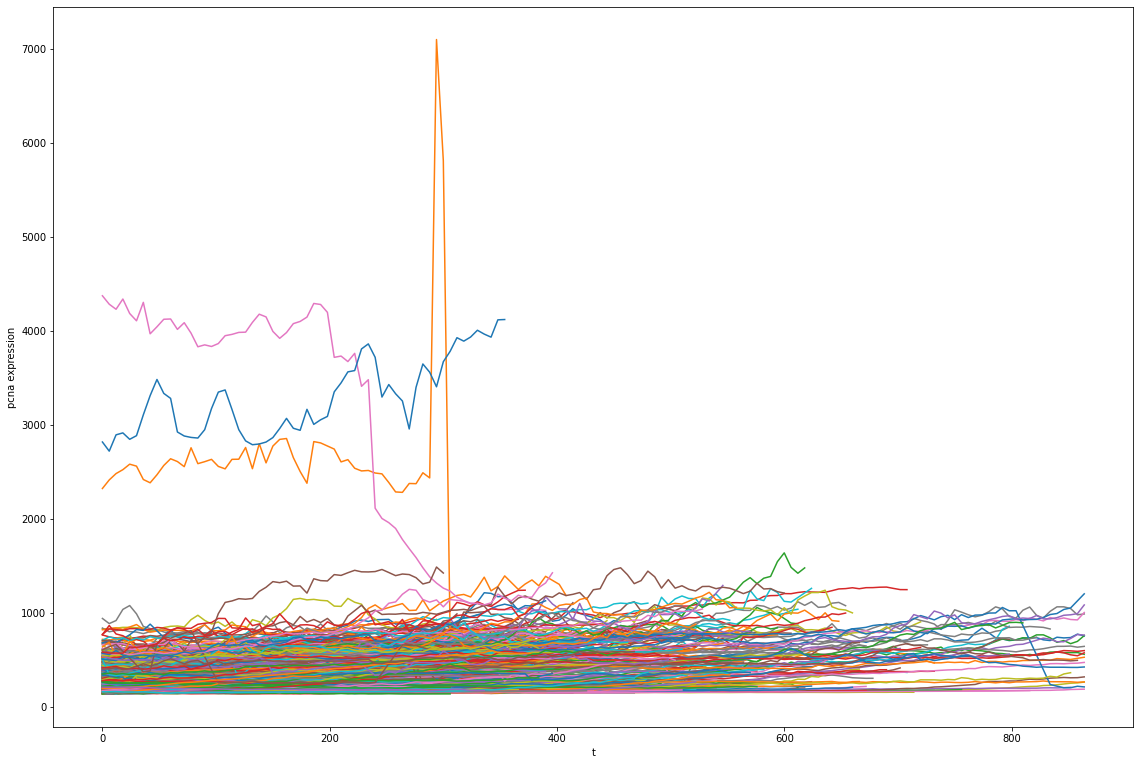

In [4]:
### plot mean intensity for all trajectories ###
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
for sct_idx in range(len(sct_list)):
    ax.plot(all_traj_zero_init_time[sct_idx],all_traj_pcna_mean_int[sct_idx])
ax.set_ylabel('pcna expression')
ax.set_xlabel('t')
plt.savefig('filename.jpg',bbox_inches='tight', dpi=150)
plt.show()

intensity range

In [37]:
### compute intensity range time series ###
all_traj_zero_init_time = []
all_traj_pcna_int_range = []
for sct_idx in range(len(sct_list)):
        sct_path = sct_list[sct_idx]
        with open (sct_path, 'rb') as fp:
                sct = pickle.load(fp)
        sct_zero_init_time = sct.traj_seri[:,0]-np.min(sct.traj_seri[:,0])   # decreases initial time to 0
        sct_int_range = sct.traj_pcna_feature_values[2]
        all_traj_zero_init_time.append(sct_zero_init_time)
        all_traj_pcna_int_range.append(sct_int_range)

In [ ]:
### plot mean intensity for all trajectories ###
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
for sct_idx in range(len(sct_list)):
    ax.plot(all_traj_zero_init_time[sct_idx],all_traj_pcna_int_range[sct_idx])
    ax.set_title('XY1_175 intensity range (bad trajectory)')
ax.legend()
ax.set_ylabel('pcna intensity range')
ax.set_xlabel('t')
plt.savefig('XY2_196.jpg',bbox_inches='tight', dpi=150)
plt.show()

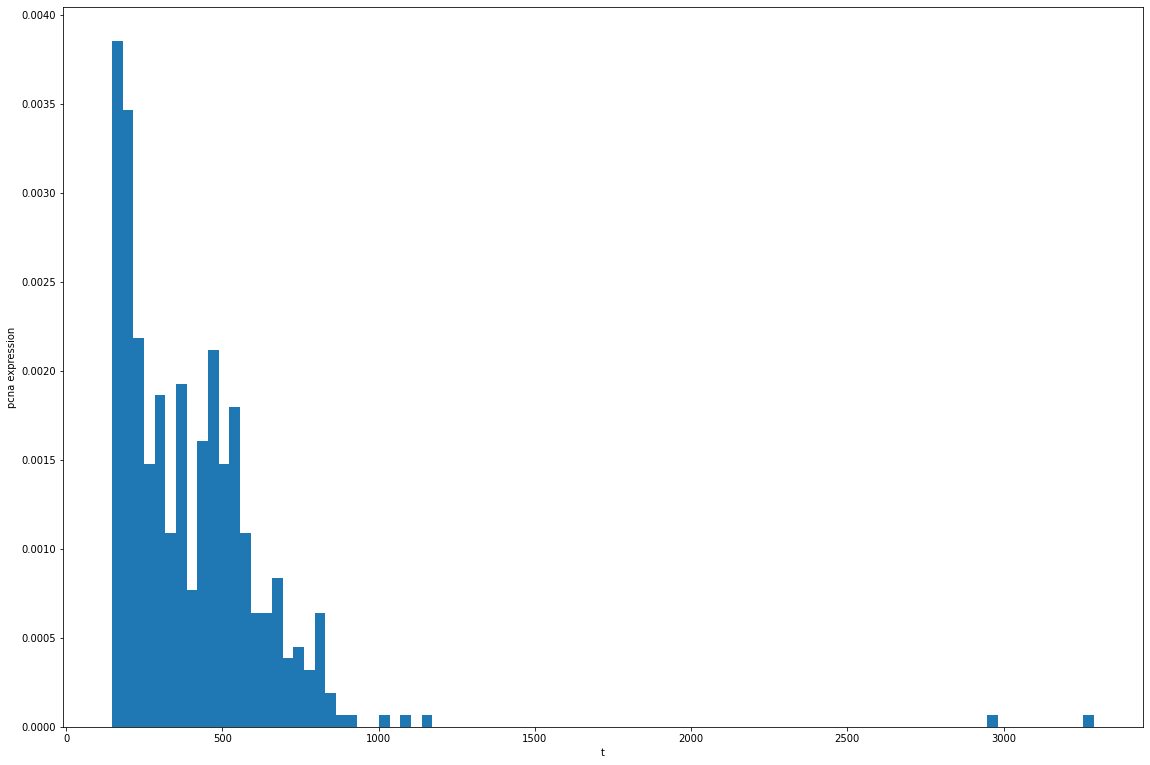

In [44]:
### plot histogram of mean intensity of each trajectory ###
all_traj_pcna_temporal_mean_int = []
for sct_idx in range(len(all_traj_pcna_mean_int)):
    all_traj_pcna_temporal_mean_int.append(np.mean(all_traj_pcna_mean_int[sct_idx]))

n_bin = math.ceil(len(all_traj_pcna_temporal_mean_int)/5)

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.hist(all_traj_pcna_temporal_mean_int, density=True, bins=n_bin)  # density=False would make counts
ax.set_ylabel('pcna expression')
ax.set_xlabel('t')
plt.savefig('011322-tintmean.jpg',bbox_inches='tight', dpi=150)

thresholding-create new folder with satisfactory trajectories

In [45]:
good_traj_thres = 400

print(str(sum(i < good_traj_thres for i in all_traj_pcna_temporal_mean_int))+'/'+str(len(all_traj_pcna_temporal_mean_int))+' will be ditched')
good_traj_path = output_path+'traj/'+traj_folder+'-strong_pcna/'

250/456 will be ditched


In [46]:
if not os.path.exists(good_traj_path):
    os.makedirs(good_traj_path)
for sct_idx in range(len(sct_list)):
    if all_traj_pcna_temporal_mean_int[sct_idx] >= good_traj_thres:
        shutil.copy(sct_list[sct_idx],good_traj_path)